In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from os.path import expanduser

In [3]:
experiment_base_dir = '/media/big-ssd/experiments'
experiment_name = 'P3856'
feature_detection_method = 'pasef'

IDENTIFICATIONS_DIR = '{}/identifications-{}-cs-true-fmdw-false'.format(expanduser("~"), feature_detection_method)

IDENTIFICATIONS_FILE = '{}/exp-{}-identifications-{}.pkl'.format(IDENTIFICATIONS_DIR, experiment_name, feature_detection_method)
IDENTIFICATIONS_RECAL_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_DIR, experiment_name, feature_detection_method)

In [4]:
MAXIMUM_Q_VALUE = 0.01

In [5]:
with open(IDENTIFICATIONS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_df = d['identifications_df']
identifications_df = identifications_df[(identifications_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [6]:
with open(IDENTIFICATIONS_RECAL_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_recal_df = d['identifications_df']
identifications_recal_df = identifications_recal_df[(identifications_recal_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

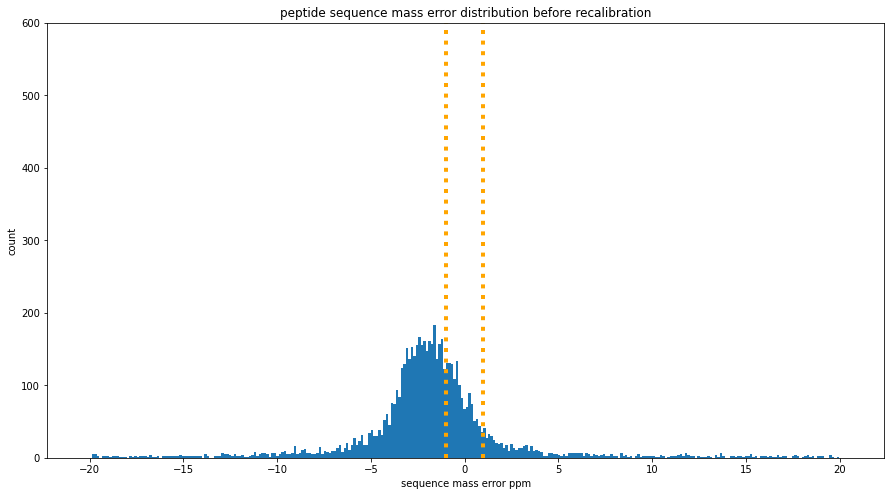

In [14]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('peptide sequence mass error distribution before recalibration')

bins = 300
hist, bins, _ = plt.hist(identifications_df.mass_accuracy_ppm, bins=bins)
plt.xlabel('sequence mass error ppm')
plt.ylabel('count')

# plt.xlim((-20,20))
plt.ylim((0,600))

plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()

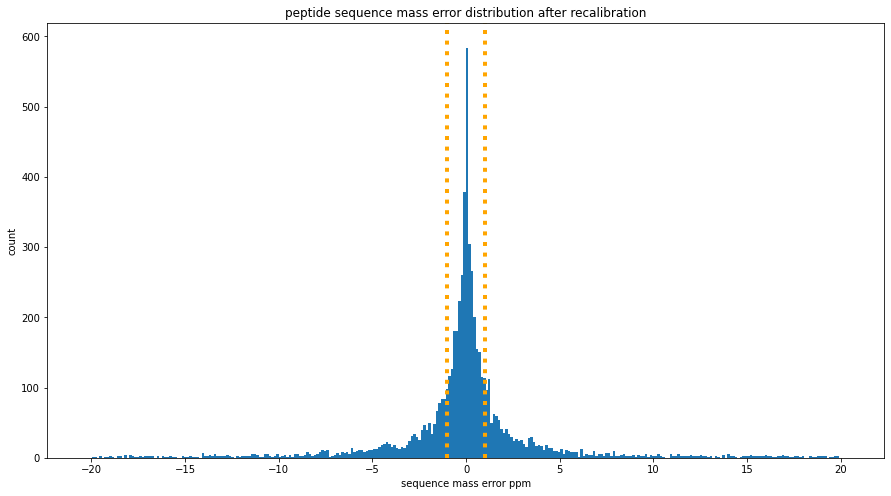

In [8]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('peptide sequence mass error distribution after recalibration')

bins = 300
hist, bins, _ = plt.hist(identifications_recal_df.mass_accuracy_ppm, bins=bins)
plt.xlabel('sequence mass error ppm')
plt.ylabel('count')

# plt.xlim((-20,20))
# plt.ylim((0,1200))

plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()

#### how many unique identifications before and after?

In [11]:
# take the best instance of a unique sequence
sequences_l = []
for group_name,group_df in identifications_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    best = group_df.loc[group_df['percolator q-value'].idxmin()]
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':best['percolator score'], 'q_value':best['percolator q-value']})
unique_identifications_df = pd.DataFrame(sequences_l)

In [12]:
# take the best instance of a unique sequence
sequences_l = []
for group_name,group_df in identifications_recal_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    best = group_df.loc[group_df['percolator q-value'].idxmin()]
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':best['percolator score'], 'q_value':best['percolator q-value']})
unique_identifications_recal_df = pd.DataFrame(sequences_l)

In [13]:
print('{} uniques before recal, {} uniques after recal'.format(len(unique_identifications_df), len(unique_identifications_recal_df)))

4954 uniques before recal, 4988 uniques after recal
